# <center>Project-Based Assignment CLO-2</center>

<b>Topik</b>
Eksplorasi dan Implementasi Model Regresi terhadap Dataset Wine Quality Menggunakan Metode Artificial Neural Network (ANN)

<b>Anggota Kelompok</b>
1. Deaz Setyo Nugroho - 1301210248
2. Stefhan Salim - 1301210529
3. Valent Fauzan Al Rasyid - 1301213194

# Load dataset

In [ ]:
import numpy as np
import pandas as pd

# For Data Preprocessing and visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Sumber to: https://stackoverflow.com/questions/56611698/pandas-how-to-read-csv-file-from-google-drive-public
url= 'https://drive.google.com/file/d/1DJNq14a4mPizTS0iC8qMCpi3Oi5OJ0jw/view?usp=drive_link'
url= 'https://drive.google.com/uc?id=' + url.split('/')[-2]

wine_white = pd.read_csv(url,sep=';')

In [ ]:
wine_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# Data Exploration

In [ ]:
#Check null value dalam dataset winequality_white
wine_white.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

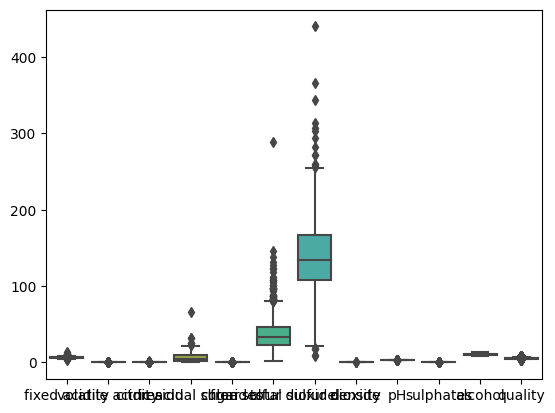

In [ ]:
#melihat outlier dalam dataset wine_white
sns.boxplot(data=wine_white)
plt.show()

In [ ]:
#Menghapus outlier dalam dataset wine_white
z_scores = stats.zscore(wine_white)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)

#Creating new datframe with with the filtered values
wine_new = wine_white[filtered_entries]

In [ ]:
#Identifying number of rows in new dataframe with the filtered values
wine_new_rows = len(wine_new)

#Number of rows in the original dataframes
wine_rows = len(wine_white.index)

#Reduction in the rows of the dataset
wine_reduction = wine_rows - wine_new_rows
wine_reduction_percent = (wine_reduction/wine_rows)*100

print(wine_reduction,"outlier telah dihapus dari dataset wine_white. Artinya, sekitar", round(wine_reduction_percent,2),"% data telah dihilangkan." )

411 outlier telah dihapus dari dataset wine_white. Artinya, sekitar 8.39 % data telah dihilangkan.


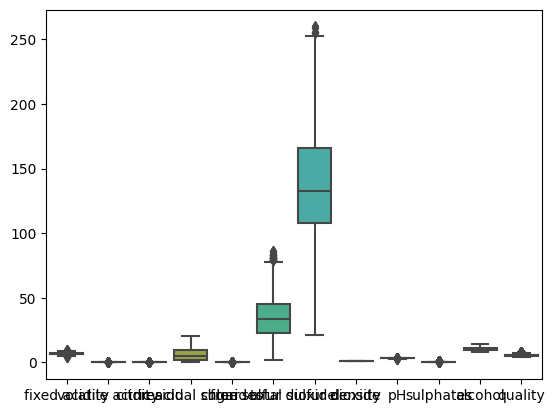

In [ ]:
sns.boxplot(data=wine_new)
plt.show()

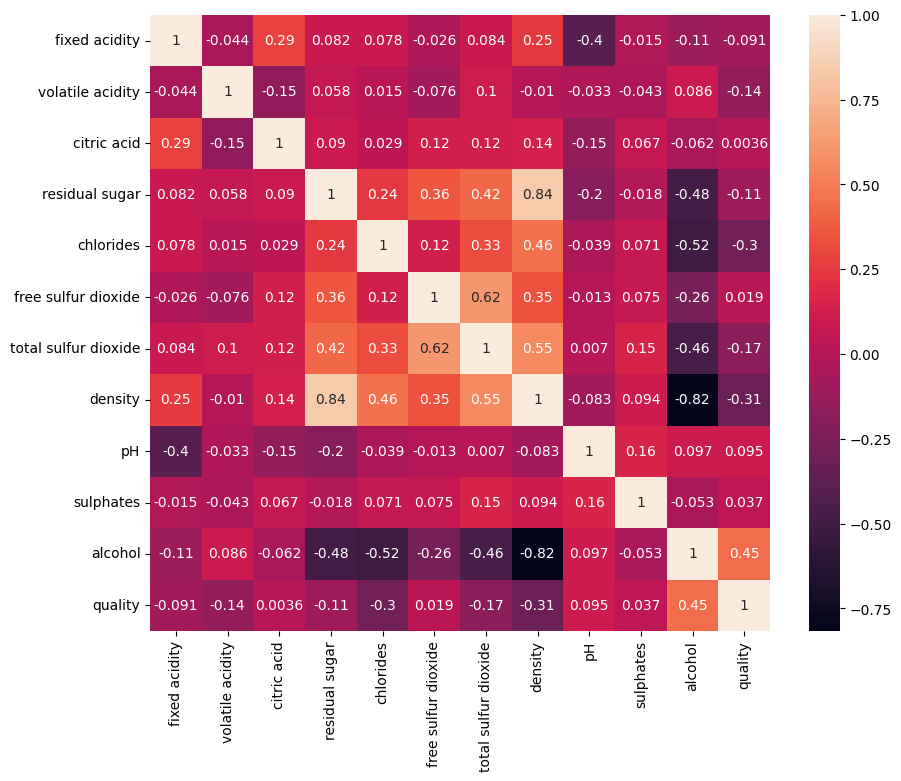

In [ ]:
#heatmap untuk melihat korelasi antar fitur
plt.figure(figsize=(10, 8))
sns.heatmap(wine_new.corr(), annot=True)

plt.show()

# Data Preprocessing

In [ ]:
# Menghapus kolom yang tidak digunakan
columns_to_delete = [
    "fixed acidity", "volatile acidity", "citric acid",
    "residual sugar", "chlorides", "free sulfur dioxide",
    "pH", "sulphates"
]

for column in columns_to_delete:
  wine_new = wine_new.drop(column, axis=1)

## Normalisasi
Normalisasi yang digunakan adalah min-max normalization dengan rentang [0, 1]

In [ ]:
# Normalize data
def normalize(dataset):
  return (dataset - dataset.min()) / (dataset.max() - dataset.min())

In [ ]:
# Membagi data testing dan training. Rasio ...
split = int(0.2 * wine_new.shape[0])
test, train = (
        wine_new.iloc[0: split].reset_index(drop=True),
        wine_new.iloc[split:].reset_index(drop=True)
)

x_test = normalize(test.drop("quality", axis=1))
y_test = normalize(test.quality)
x_train = normalize(train.drop("quality", axis=1))
y_train = normalize(train.quality)

# Latar Belakang
Banyak metode-metode pembelajaran mesin yang dapat digunakan untuk melatih sebuah model untuk dataset Wine Quality, namun metode tersebut tidak menawarkan fleksibilitas seperti yang ditawarkan oleh metode ANN. ANN memiliki banyak hyperparameter yang dapat diatur sebelum proses pembelajaran (training), seperti banyaknya hidden layer, learning rate, banyaknya epoch, dan lain sebagainya. Hyperparameter tersebut dapat digunakan untuk menyesuaikan model dengan dataset Wine Quality, akan tetapi belum ditemukan cara menentukan hyperparameter yang cocok untuk digunakan dalam melatih model dengan dataset Wine Quality karena belum ada cara yang pasti untuk menentukannya. Dalam penelitian ini, tujuan yang ingin dicapai adalah eksplorasi sejumlah variasi model yang dapat dibentuk melalui penyesuaian hyperparameter serta membandingkan variasi-variasi model tersebut dengan model baseline.


# Ringkasan Metode
Adapun metode yang akan digunakan adalah **Artificial Neural Network (ANN).** Metode ini dipilih karena fleksibilitasnya berkat banyaknya hyperparameter yang bisa diatur.

## Fungsi Aktivasi
Fungsi aktivasi yang akan digunakan adalah fungsi sigmoid. Fungsi ini berfungsi untuk membatasi angka yang sangat besar atau kecil menjadi di jangkauan 0 dan 1. Adapun rumus dari fungsi sigmoid adalah `1 / (1 + e^(-z))`. Adapun turunan dari fungsi tersebut adalah `sigmoid(z) - sigmoid(z)^2` (Sumber: Slide Minggu 5 ANN). Ini digunakan karena fungsi aktivasi yang digunakan adalah sigmoid

In [ ]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def turunan1_sigmoid(z):
  return sigmoid(z)*(1 - sigmoid(z))

## Cost Function
Fungsi ini akan digunakan untuk menghitung tingkat error dari prediksi yang dilakukan oleh model. Fungsi yang akan digunakan adalah fungsi MSE (Mean Square Error)

In [ ]:
def loss(y_prediksi, y_sebenarnya):
  n_data = y_prediksi.shape[0]
  sum_square_error = 0
  for idx in range(n_data):
    sum_square_error += (y_prediksi[idx] - y_sebenarnya[idx])**2
  return sum_square_error[0] / n_data

## Implementasi Model
Berikut adalah impelementasi dari model beserta penjelasan mengenai hyperparameter yang digunakannya

### Baseline Model
```
Hidden layer        : 1
Node di hidden layer: 8
Bias                : 0
Epoch               : 32
Learning rate       : 0.00001
Fungsi aktivasi     : sigmoid
```

In [ ]:
def baseline_model():
  baseline_train_error = []
  NODE_HIDDEN_LAYER = 8
  BIAS = 0

  input_data = x_train
  FITUR_INPUT = input_data.shape[1]
  actual = y_train

  # Inisialisasi weight (w) awal sebelum process training
  # arg1: Berapa node di layer sebelumnya
  # arg2: Berapa node di layer ini yang akan dibuat
  l1_weights = 2*np.random.rand(FITUR_INPUT, NODE_HIDDEN_LAYER) - 1
  l2_weights = 2*np.random.rand(NODE_HIDDEN_LAYER, 1) - 1

  EPOCH = 32
  for i in range(EPOCH):
    # Feed-Forward (Hitung nilai untuk digunakan oleh node-node di layer selanjutnya)
    A1 = sigmoid(np.dot(input_data, l1_weights))
    A2 = sigmoid(np.dot(A1, l2_weights))

    error_rate = loss(A2, actual)
    baseline_train_error.append(error_rate)

    # Backpropagation (Menentukan seberapa perubahan yang perlu
    # dilakukan untuk meminimalkan error rate di epoch selanjutnya)
    delta_l2_weights = error_rate * turunan1_sigmoid(A2)
    delta_l1_weights = delta_l2_weights.dot(l2_weights.T) * turunan1_sigmoid(A1)

    # Perbarui weights berdasarkan perubahan yang perlu dilakukan (delta)
    learning_rate = 0.00001
    l2_weights += np.dot(A1.T, delta_l2_weights)*learning_rate
    l1_weights += np.dot(input_data.T, delta_l1_weights)*learning_rate

  return (baseline_train_error, [l1_weights, l2_weights])

### Eksplorasi Model 1
```
Hidden layer        : 1
Node di hidden layer: 8
Bias                : 0
Epoch               : 16
Learning rate       : 0.000025
Fungsi aktivasi     : sigmoid
```

In [ ]:
def eksplorasi_model1():
  baseline_train_error = []
  NODE_HIDDEN_LAYER = 8
  BIAS = 0

  input_data = x_train
  FITUR_INPUT = input_data.shape[1]
  actual = y_train

  # Inisialisasi weight (w) awal sebelum process training
  # arg1: Berapa node di layer sebelumnya
  # arg2: Berapa node di layer ini yang akan dibuat
  l1_weights = 2*np.random.rand(FITUR_INPUT, NODE_HIDDEN_LAYER) - 1
  l2_weights = 2*np.random.rand(NODE_HIDDEN_LAYER, 1) - 1

  EPOCH = 16
  for i in range(EPOCH):
    # Feed-Forward (Hitung nilai untuk digunakan oleh node-node di layer selanjutnya)
    A1 = sigmoid(np.dot(input_data, l1_weights))
    A2 = sigmoid(np.dot(A1, l2_weights))

    error_rate = loss(A2, actual)
    baseline_train_error.append(error_rate)

    # Backpropagation (Menentukan seberapa perubahan yang perlu
    # dilakukan untuk meminimalkan error rate di epoch selanjutnya)
    delta_l2_weights = error_rate * turunan1_sigmoid(A2)
    delta_l1_weights = delta_l2_weights.dot(l2_weights.T) * turunan1_sigmoid(A1)

    # Perbarui weights berdasarkan perubahan yang perlu dilakukan (delta)
    learning_rate = 0.000025
    l2_weights += np.dot(A1.T, delta_l2_weights)*learning_rate
    l1_weights += np.dot(input_data.T, delta_l1_weights)*learning_rate

  return (baseline_train_error, [l1_weights, l2_weights])

### Eksplorasi Model 2
```
Hidden layer        : 1
Node di hidden layer: 128
Bias                : 0
Epoch               : 32
Learning rate       : 0.0001
Fungsi aktivasi     : sigmoid
```

In [ ]:
def eksplorasi_model2():
  exploratory_train_error = []
  NODE_HIDDEN_LAYER = 128
  BIAS = 0

  input_data = x_train
  FITUR_INPUT = input_data.shape[1]
  actual = y_train

  # Inisialisasi weight (w) awal sebelum process training
  # arg1: Berapa node di layer sebelumnya
  # arg2: Berapa node di layer ini yang akan dibuat
  l1_weights = 2*np.random.rand(FITUR_INPUT, NODE_HIDDEN_LAYER) - 1
  l2_weights = 2*np.random.rand(NODE_HIDDEN_LAYER, 1) - 1

  EPOCH = 32
  for i in range(EPOCH):
    # Feed-Forward (Hitung nilai untuk digunakan oleh node-node di layer selanjutnya)
    A1 = sigmoid(np.dot(input_data, l1_weights))
    A2 = sigmoid(np.dot(A1, l2_weights))

    error_rate = loss(A2, actual)
    exploratory_train_error.append(error_rate)

    # Backpropagation (Menentukan seberapa perubahan yang perlu
    # dilakukan untuk meminimalkan error rate di epoch selanjutnya)
    delta_l2_weights = error_rate * turunan1_sigmoid(A2)
    delta_l1_weights = delta_l2_weights.dot(l2_weights.T) * turunan1_sigmoid(A1)

    # Perbarui weights berdasarkan perubahan yang perlu dilakukan (delta)
    learning_rate = 0.0001
    l2_weights += np.dot(A1.T, delta_l2_weights)*learning_rate
    l1_weights += np.dot(input_data.T, delta_l1_weights)*learning_rate

  return (exploratory_train_error, [l1_weights, l2_weights])

### Eksplorasi Model 3
```
Hidden layer        : 2
Node di hidden layer: [32, 8]
Bias                : 0
Epoch               : 16
Learning rate       : 0.000001
Fungsi aktivasi     : sigmoid
```

In [ ]:
def eksplorasi_model3():
  exploratory_train_error = []

  # Tentukan hyperparameternya
  NODE_HIDDEN_LAYER = 32
  NODE_HIDDEN_LAYER2 = 8
  BIAS = 0

  # Tentukan data yang akan digunakan
  input_data = x_train
  FITUR_INPUT = input_data.shape[1]
  actual = y_train

  # Inisialisasi weight (w) awal sebelum process training
  # arg1: Berapa node di layer sebelumnya
  # arg2: Berapa node di layer ini yang akan dibuat
  l1_weights = 2*np.random.rand(FITUR_INPUT, NODE_HIDDEN_LAYER) - 1
  l2_weights = 2*np.random.rand(NODE_HIDDEN_LAYER, NODE_HIDDEN_LAYER2) - 1
  l3_weights = 2*np.random.rand(NODE_HIDDEN_LAYER2, 1) - 1

  EPOCH = 16
  for i in range(EPOCH):
    # Feed-Forward (Lanjut ke node di layer selanjutnya)
    A1 = sigmoid(np.dot(input_data, l1_weights))
    A2 = sigmoid(np.dot(A1, l2_weights))
    A3 = sigmoid(np.dot(A2, l3_weights))

    # Hitung tingkat error dari iterasi saat ini
    error_rate = loss(A3, actual)
    exploratory_train_error.append(error_rate)

    # Backpropagation (Tentukan perubahan yang harus dilakukan)
    delta_l3_weights = error_rate * turunan1_sigmoid(A3)
    delta_l2_weights = delta_l3_weights.dot(l3_weights.T) * turunan1_sigmoid(A2)
    delta_l1_weights = delta_l2_weights.dot(l2_weights.T) * turunan1_sigmoid(A1)

    # Aplikasikan perubahan tersebut ke bobot yang digunakan
    learning_rate = 0.000001
    l3_weights += np.dot(A2.T, delta_l3_weights)*learning_rate
    l2_weights += np.dot(A1.T, delta_l2_weights)*learning_rate
    l1_weights += np.dot(input_data.T, delta_l1_weights)*learning_rate

  return (exploratory_train_error, [l1_weights, l2_weights, l3_weights])

### Evaluasi Model

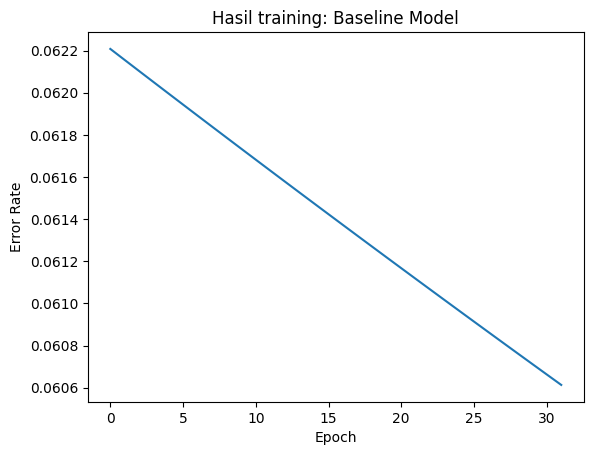

Error rate saat testing untuk Baseline Model: 0.06300700



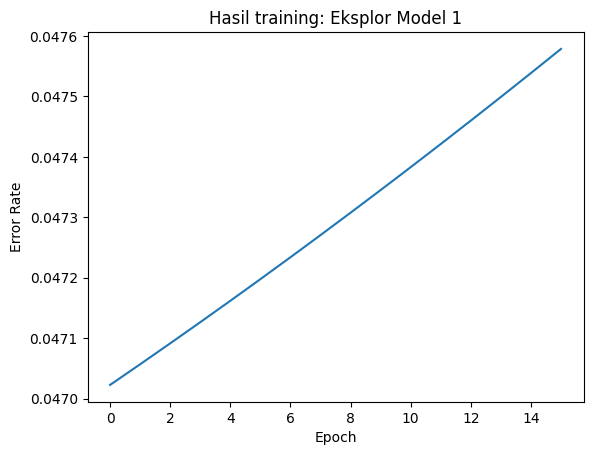

Error rate saat testing untuk Eksplor Model 1: 0.05098056



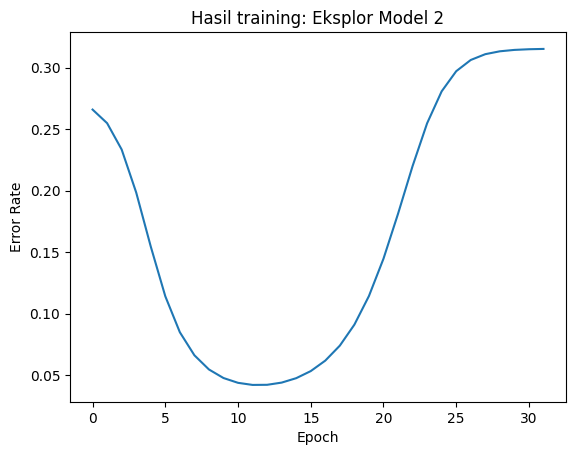

Error rate saat testing untuk Eksplor Model 2: 0.32415728



In [ ]:
# Dapatkan hasil traning
hasil_training = [
    baseline_model(),
    eksplorasi_model1(),
    eksplorasi_model2(),
]

# Siapkan data yang akan digunakan
input_data = x_test
actual = y_test

# Evaluasi model dengan 1 hidden layer
model_names = ["Baseline Model", "Eksplor Model 1", "Eksplor Model 2"]
for idx, (train_result, model) in enumerate(hasil_training):
  # Membuat diagram garis tentang performa model ketika training
  y_label = train_result
  x_label = [e for e in range(len(y_label))]
  plt.plot(x_label, y_label)
  plt.title(f"Hasil training: {model_names[idx]}")
  plt.xlabel("Epoch")
  plt.ylabel("Error Rate")
  plt.show()

  # Feed-Forward (Hitung nilai untuk digunakan oleh node-node di layer selanjutnya)
  A1 = sigmoid(np.dot(input_data, model[0]))
  A2 = sigmoid(np.dot(A1, model[1]))
  error_rate = loss(A2, actual)
  print(f"Error rate saat testing untuk {model_names[idx]}: {error_rate:.8f}\n")

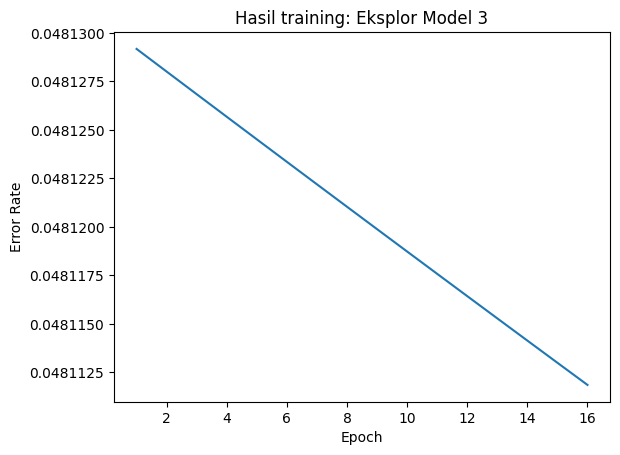

Error rate saat testing untuk Baseline Model: 0.05082186


In [ ]:
explore_weights3 = eksplorasi_model3()
# Evaluasi model dengan 2 hidden layer
for idx, (train_result, model) in enumerate([explore_weights3]):
  # Membuat diagram garis tentang performa model ketika training
  y_label = train_result
  x_label = [e + 1 for e in range(len(y_label))]
  plt.plot(x_label, y_label)
  plt.title(f"Hasil training: Eksplor Model 3")
  plt.xlabel("Epoch")
  plt.ylabel("Error Rate")
  plt.show()

  # Feed-Forward (Hitung nilai untuk digunakan oleh node-node di layer selanjutnya)
  A1 = sigmoid(np.dot(input_data, model[0]))
  A2 = sigmoid(np.dot(A1, model[1]))
  A3 = sigmoid(np.dot(A2, model[2]))
  error_rate = loss(A3, actual)
  print(f"Error rate saat testing untuk {model_names[idx]}: {error_rate:.8f}")


# Hasil dan Analisis
Dari model yang telah dibuat terdapat satu buah model base-line dan 3 model yang telah dimodifikasi hyperparameternya. Dari hasil testing dan training dari keseluruhan model didapat :

*   Model base-line : memiliki error rate yang terus menurun pada training dan error rate yang kecil pada testing
*   Model 1 :memiliki error rate yang terus meningkat. Meskipun begitu, model ini memiliki nilai error rate yang lebih kecil dibandingkan model baseline baik pada saat training maupun testing. Adapun peningkatan error rate yang terjadi antar epoch tidak signifikan.

*   Model 2 : memiliki perubahan error rate yang bermacam-macam seiring banyaknya epoch yang dilewati. Pada epoch ke-1 hingga ke-10, error rate menurun, lalu pada sekitar epoch ke-12, error rate kembali meningkat, dan akhirnya stagnan pada sekiar epoch ke-27. Selain itu, Model 2 memiliki memiliki error rate pada tahap testing yang paling besar dari semua varian model, termasuk baseline model.

*   Model 3 : memiliki error rate yang juga terus menurun layaknya model baseline. Akan tetapi, tingkat error rate dari model 3 tidak menurun secepat model 1 dan baseline model. Model 3 memiliki error rate pada tahap testing yang juga lebih kecil dari baseline model.





# Kesimpulan
Berdasarkan hasil error rate yang diperlihatkan pada grafik training dan MSE saat testing dari keseluruhan model, Model 3 memiliki performa yang paling optimal dibandingkan dengan model lainnya. Model 1 dan 2 memberikan performa yang tidak optimal karena error rate yang dihasilkan saat training cenderung tinggi. Model base-line memberikan hasil yang optimal, tetapi jika dibandingkan dengan model 3, model 3 masih lebih optimal karena menghasilkan MSE yang lebih rendah.

